<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info() # Общий обзор таблицы
display(df.describe()) # Обзор таблицы с параметрами
display(df.isna().sum()) # Обзор на наличие пропусков в данных
display(df.duplicated().sum()) # Обзор на наличие дубликатов в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

0

In [38]:
display(df.head(20)) # Вывод первых 20-ти строк
display(df['open_plan'].tail(10)) #Этот столбец не умещался в масштаб вывода
display(df['studio'].tail(10)) #Этот столбец не умещался в масштаб вывода

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


23689    False
23690    False
23691    False
23692    False
23693    False
23694    False
23695    False
23696    False
23697    False
23698    False
Name: open_plan, dtype: bool

23689    False
23690    False
23691    False
23692    False
23693    False
23694    False
23695    False
23696    False
23697    False
23698    False
Name: studio, dtype: bool

### Вывод

22 столбцов с 23699 строк данных, но во многих столбцах вместо значений присутствуют пропуски (NaN) .
По предварительной оценке видно:
- в четырнадцати столбцах присутствуют пропуски в данных.
- строки-дубликаты отсутствуют.
- столбцы 'last_price', 'floor' и другие следует привести к целочисленному типу по своему смыслу: этажа 5,5 не бывает, десятые доли в значениях цены или расстояний не несут никакой пользы для исследования и являются излишними.
- пропуски в некоторых столбцах можно заменить на соответствующие значения.
- следует провести более детальный осмотр на наличие других аномалий в данных.

## Предобработка данных

Замена значений NaN

In [41]:
#pd.options.mode.chained_assignment = None  # default='warn'
df.fillna(value = 
          {'balcony': 0, 
           'ponds_around3000': 0, 
           'parks_around3000' : 0, 
           'locality_name': '', 
           'is_apartment': 'False',
           'floors_total' : df['floors_total'].median(),
           'living_area' : df['living_area'].median(),
           'kitchen_area' : df['kitchen_area'].median(),
           'ceiling_height': df['ceiling_height'].median()}, inplace=True)

df.loc[df['floors_total'] < df['floor'], 'floors_total'] = np.NaN #возращение пропусков по условию
df.loc[df['total_area'] < df['living_area'], 'living_area'] = np.NaN #возращение пропусков по условию
#df.loc[df['total_area'] < df['kitchen_area'], 'kitchen_area'] = np.NaN #здесь подобных замен не наблюдается
display(df.loc[df['living_area'] < df['kitchen_area']]) #378 строк найдено
display(df['kitchen_area'].median())
display(df[df['living_area'] < 9.1]) #Найдена 21 строка из них только 3 с медианным значением в данных площади кухни
#df.loc[df['living_area'] < df['kitchen_area'], 'kitchen_area'] = np.NaN #378 замен произведено

df.info()
display(df.isna().sum())

9.1

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.4,2019-02-07T00:00:00,1,2.90,8.0,8.3,7,False,...,6.3,0.0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
680,14,7200000.0,43.0,2017-10-31T00:00:00,1,2.65,8.0,9.0,2,False,...,23.0,0.0,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.0,2017-01-29T00:00:00,2,2.70,25.0,9.0,15,False,...,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
2309,10,4200000.0,62.4,2017-06-15T00:00:00,2,2.60,9.0,8.4,6,False,...,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.65,17.0,3.0,17,False,...,11.0,0.0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
4100,17,5300000.0,34.8,2017-06-19T00:00:00,1,2.70,23.0,9.0,15,False,...,17.1,0.0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0
4542,12,3300000.0,18.0,2018-11-07T00:00:00,1,3.50,5.0,9.0,2,False,...,9.1,0.0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
7312,8,3400000.0,27.0,2018-02-21T00:00:00,2,2.50,15.0,9.0,4,False,...,16.0,0.0,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN
8325,9,4800000.0,52.0,2017-10-25T00:00:00,2,2.65,5.0,9.0,2,False,...,6.0,1.0,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,False,...,9.0,0.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
51,7,45000000.0,161.00,2017-10-17T00:00:00,3,3.20,8.0,38.00,4,False,...,50.00,0.0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
53,7,4300000.0,39.10,2017-11-10T00:00:00,1,2.65,25.0,15.40,13,False,...,15.50,2.0,посёлок Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0
101,4,3000000.0,37.00,2019-03-23T00:00:00,1,2.75,10.0,12.00,3,False,...,13.00,0.0,садовое товарищество Новая Ропша,NaN,NaN,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23388,7,5400000.0,43.00,2017-04-24T00:00:00,1,2.65,18.0,12.00,8,False,...,20.00,0.0,Санкт-Петербург,25108.0,15940.0,0.0,NaN,0.0,NaN,124.0
23481,1,3000000.0,37.29,2019-04-15T00:00:00,1,2.65,19.0,10.08,10,False,...,16.88,0.0,Санкт-Петербург,37006.0,15157.0,0.0,NaN,0.0,NaN,7.0
23573,8,6290000.0,47.67,2019-03-20T00:00:00,1,3.60,12.0,13.59,12,False,...,17.87,2.0,Санкт-Петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0
23574,14,64990000.0,139.00,2015-11-24T00:00:00,3,3.00,8.0,3.00,8,False,...,16.00,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23662 non-null float64
living_area             23622 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around30

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               37
living_area                77
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Данных, где площадь кухни была бы больше общей не было обнаружено. В ситуации же с отношением к жилой площади сложнее. Да по логике жилая площадь больше площади кухни, но на деле это невсегда так. Найдено 378 объявлений, где кухня больше жилой площади. Из них лишь 21 имеют жилую площадь меньше замененного мною медианного значения. А из них лишь 3 имеют значения медианы. Такое большое количество в 378 говорит о том, что подобные жилые помещения есть, а порой и вовсе жилая площадь составляет 2-5 квадратов, что ничтожно мало. Потому считаю , что замена пропусков на медианну не сказалась негативно, и последующую "перезамену" производить не следует.

Замена типов значений

In [5]:
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,False,...,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Обработка столбца со временем

In [6]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(df.head())
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

Поиск и обработка аномальных значений

Редактирование столбца 'last_price'

1

10

26

145

819

69

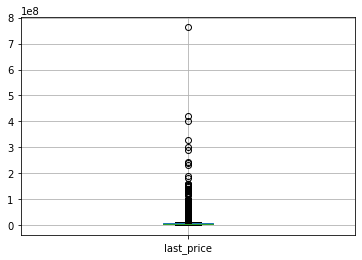

In [7]:
#df['last_price'].hist(bins=50) #В данном случаи гистограмма не очень информативна
df.boxplot('last_price') #На диаграмме размаха заметен явный выброс, его нужно убрать
display(df[df['last_price'] > 700000000]['last_price'].count()) # Находим выброс, он один
df.drop(df[df['last_price'] > 700000000].index, inplace=True) #Удаляем строку с выбросом
display(df[df['last_price'] > 170000000]['last_price'].count()) #Продолжим удалять выбросы
df.drop(df[df['last_price'] > 170000000].index, inplace=True)
display(df[df['last_price'] > 100000000]['last_price'].count())
df.drop(df[df['last_price'] > 100000000].index, inplace=True)
display(df[df['last_price'] > 40000000]['last_price'].count()) #Даже сейчас предел нормальных значений находится далеко, 
                                                               #верхняя граница в районе 12мл.
display(df[df['last_price'] > 18000000]['last_price'].count()) 
display(df[df['last_price'] < 700000]['last_price'].count()) # Найдено 69 значений выбросов нижней границы
df.drop(df[df['last_price'] < 700000].index, inplace=True) #Удаляем выбросы нижней границы
df.drop(df[df['last_price'] > 18000000].index, inplace=True) #Удалим все значения(выбросы) выше этой отметки

Столбец 'last_price' важный параметр в котором присутствовал очень большой диапазон разброса значений. Убрав выбросы, я подготовил столбец к дальнейшим исследованиям. В целом было убрано около 4% всех значений, что не повлияет на результат, а наоборот сделает выборку более эффективной.

Редактирование столбца 'total_area'

1

6

304

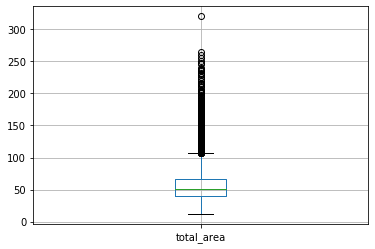

In [8]:
df.boxplot('total_area') #На первый взгляд видно, что диапазон нормальных значений расположился в районе 10 до 110 
                         #явный выброс в значении 300+
display(df[df['total_area'] > 300]['total_area'].count())
df.drop(df[df['total_area'] > 300].index, inplace=True)
display(df[df['total_area'] < 15]['total_area'].count()) #Выбросы нижней границы
df.drop(df[df['total_area'] < 15].index, inplace=True)
display(df[df['total_area'] > 130]['total_area'].count()) #Найдем сколько значений выше этой границы
df.drop(df[df['total_area'] > 130].index, inplace=True)

Редактирование столбца 'ceiling_height'

12

80

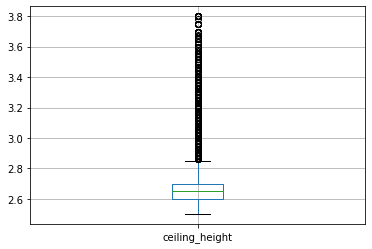

In [9]:
#df.boxplot('ceiling_height') #Явный выброс в районе 100, а так же много аномальных значений в диапазоне 10+
df.drop(df[df['ceiling_height'] > 80].index, inplace=True) #Удаляем явный выброс
display(df[df['ceiling_height'] > 25]['ceiling_height'].count()) #Аномалии вызванные человеческим фактором, 
                                                                 #возможно в данных поставили запятую не в том месте
def height_repair (repair):
    if repair >= 25:
        return repair / 10
    else:
        return repair
    
df['ceiling_height'] = df['ceiling_height'].apply(height_repair) #Функция на исправление аномалий
display(df[df['ceiling_height'] > 3.8]['ceiling_height'].count())
df.drop(df[df['ceiling_height'] > 3.8].index, inplace=True) #Удаление выбросов по адекватной границе (верх)
df.drop(df[df['ceiling_height'] < 2.5].index, inplace=True) #Удаление выбросов по адекватной границе (низ)
df.boxplot('ceiling_height') #Проверочный вывод
plt.show()

Редактирование столбца 'balcony'

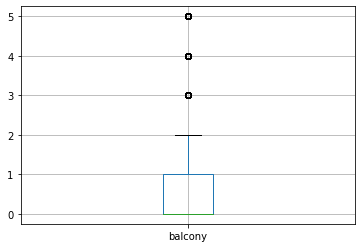

In [10]:
df.boxplot('balcony') #Я посчитал что возможен дом или вилла с таким количеством балконов, за выброс не считаю
                      #и необходимо сперва провести исследования
plt.show()

Редактирование столбца 'floors_total'

2

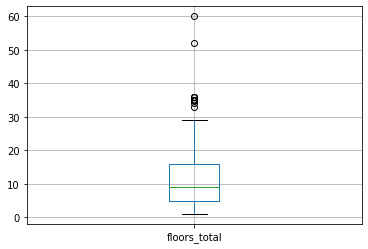

In [11]:
df.boxplot('floors_total') #Видно два явных выброса, потому как значения слишком велики и среди стодбца 'floor'
                           #подобная картина не наблюдается, где максимальный этаж около 35
display(df[df['floors_total'] > 40]['floors_total'].count()) #Я пока что оставлю 2 этих значения, 
                                                             #потому как чисто физически такие здания бывают

Редактирование столбца 'floor'

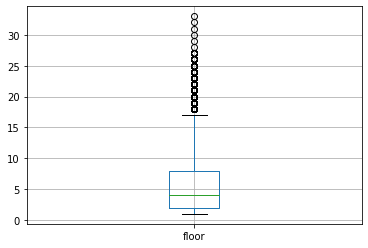

In [12]:
df.boxplot('floor') #Значения таких этажей допустимы и удалять данные по такому типу не следует, 
                    #сначала нужно провести исследования.
plt.show()

Редактирование столбца 'rooms'

1    7948
2    7758
3    5406
4     863
0     195
5     122
6      15
7       2
Name: rooms, dtype: int64

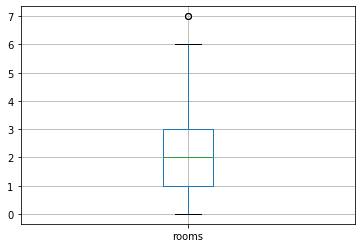

In [13]:
df.boxplot('rooms') #Семь комнат вполне допстимо
display(df['rooms'].value_counts()) #Посмотрим какие есть комнаты и сколько их
                                    #комнаты со значением 0 кажутся странными, но мб это "студии"
df[(df['rooms'] == 0) & (df['studio'] == False)]['rooms'].value_counts() #Оказывается 58 квартир с нулевым значением комнат
df.drop(df[(df['rooms'] == 0) & (df['studio'] == False)].index, inplace=True) #Удалим их, 
                                                                            #т.к важная информация касательно них отсутствует

Общий вывод:

1. Пропуски в данных заменены по своему смыслы, в большинстве случаев это медианное значение, так как оно отображает более приближенное к реальному значение. Пропуски в столбце названий населенных пунктов были заменены на пустую строку, потому как по имеющимся данным других более приемлимых вариантов нет. В таких столбцах как: balcony, ponds_around3000, parks_around3000 пропуски были заменены в соответствии с логикой на 0. В столбце с булевым типом пропуски были заменены на False - логика та же что и в случаи столбца balcony, (если нет то 0).
2. Я использовал в оценке аномальных значений (выбросов) диаграмму размаха, она наглядно показывает диапазон значений и их количество. В соответствии с этой информацией в столбцах: last_price, ceiling_height и total_area я выделил выбросы и удалил эти строки. Цена и итоговая площадь является ключевой информацией для исследования, поэтому мною выборки этих данных были отфильтрованы. В случаи столбца ceiling_height была найдена ошибка человеческого фактора, где некоторые значения были неправильно вбиты(на порядок выше), так же в этом столбце были данные физически невозможного типа(50-ти метровые потолки). Столбец был так же отфильрован по логическим границам 2,5 - 3,8 м.
3. Столбцы 'floor', 'floors_total', 'balcony' имеют выбросы и возможно аномальные значения, тем не менее я не стал удалять строки по этому признаку, т.к. он не ключевой.
4. Столбец 'rooms' содержал потенциально аномальные данные с числом комнат в значении 0. Логично предположить что таким образом указывались жилые помещения типа "студия", но сверив данные оказалось, что есть квартиры которые не принадлежат к этому типу. Эти аномалии были удалены.
5. В пяти столбцах была произведена операция замены типа данных на целочисленный(int). Доля рублей является излишней информацией, у столбцов: 'balcony', 'parks_around3000', 'ponds_around3000', 'floors_total' не может быть десятичных долей.
6. Столбцы: airports_nearest, cityCenters_nearest, days_exposition, parks_nearest, ponds_nearest я оставил без изменений. Пропуски заполнять нечем и удалять большой пласт данных нет смысла, это может негативно сказаться на дальнейшем ходе исследования.
7. Строков-дубликатов в датафрейми нет.
8. Данные пропуски появились из-за человеческого фактора: NaN эквивалентные нулю (False), (ввиду отсутствия данного праметра, пользователь счел невводить данное значение вовсе) balcony, is_apartment.
9. Данные в столбцах: kitchen_area, living_area, floors_total, ceiling_height, locality_name так же вводились пользователем, поэтому могут отсутствовать как по случайной, так и по умышленной причине.
10. Пропуски в этих столбцах parks_around3000, ponds_around3000 были заменены на 0, потому как такой параметр, как и в случаи с балконом может просто отсутствовать. В свою очередь система поставила ожидаемые пропуски в столбцах с картографическими данными parks_nearest, ponds_nearest отвечающими за расчет расстояния. Однако таких пропусков почти в 3 раза больше, а значит за 2/3 этих пропусков ответственна система, которая ввиду возможно неполных геодезических данных не сумела произвестии расчет.
11. В ситуации с данными расстояния до аэропорта и центра города airports_nearest, cityCenters_nearest, существует 49 пропусков в столбце locality_name (которые не указал сам пользователь). Разумеется в этих случаях нет возможности рассчитать данные расстояния, но т.к. таких пропусков свыше 5 тысяч наблюдается ошибка системы, похожей на те что присутствуют в расчете водоемов и парков. Возможно что какие-то участки карты просто не занесены в систему.
12. В столбце days_exposition хранятся данные о длительности размещения объявления. С системой регистрации времени первой публикации объявления все в порядке, и пропуска в данных first_day_exposition нет. Соответственно если система показывает уже снятые объявления то тогда пропусками являются еще действующие. Если же нет, тогда это ошибка сервера.

## Расчёты и добавление результатов в таблицу

Расчет цены квадратного метра

In [14]:
df['metr_price'] = df['last_price'] / df['total_area'] #Рассчитываем стоимость одного квадратного метра
df['metr_price'] = df['metr_price'].round().astype(int) #(округление по факту математического значения) и приведение к int 

Расчет соотношения жилой и общей площади, а также отношения площади кухни к общей

In [15]:
df['fraction_living_area'] = df['living_area'] / df['total_area']
df['fraction_kitchen_area'] = df['kitchen_area'] / df['total_area']

Расчет дня недели, месяца и года публикации объявления

In [16]:
df['weekday'] = df['first_day_exposition'].dt.weekday #Рассчитываем номер недели даты публикации
df['month'] = df['first_day_exposition'].dt.month #Рассчитываем месяц даты публикации
df['year'] = df['first_day_exposition'].dt.year #Рассчитываем год даты публикации

Расчет и создание столбца 'floor_category' - категория этажа квартиры

In [17]:
def what_floor (floor):
    try:
        if floor['floor'] == 1:
            return 'первый'
        if floor['floor'] == floor['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'Что-то пошло не так, нужно проверить логическое условие' 

df['floor_category'] = df.apply(what_floor, axis=1)

Итоговый вывод по 3 пункту

In [18]:
display(df.head(30)) #Данные категорезированы и занесены в новые столбцы, которые помогут в дальнейших исследованиях

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,metr_price,fraction_living_area,fraction_kitchen_area,weekday,month,year,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,NaN,120370,0.472222,0.231481,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81.0,82921,0.460396,0.272277,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574.0,558.0,92786,0.612500,0.148214,3,8,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121.0,100000,0.320000,0.410000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,NaN,55.0,95066,0.473684,0.299342,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,NaN,155.0,99196,0.284182,0.386059,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.00,22,False,...,0,NaN,NaN,110545,0.418994,0.263966,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,NaN,189.0,87455,0.465320,0.265682,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289.0,88525,0.714754,0.106557,6,2,2017,другой
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,2,553.0,137.0,127525,0.512626,0.214646,3,11,2017,другой


## Исследовательский анализ данных

Построим гистограммы для следующих параметров: площадь, цена, число комнат, высота потолков.

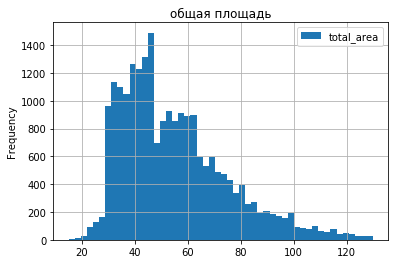

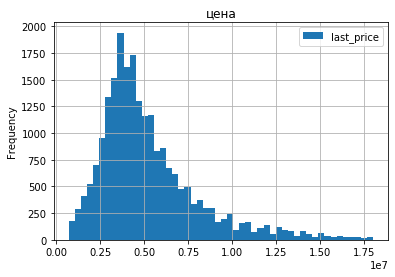

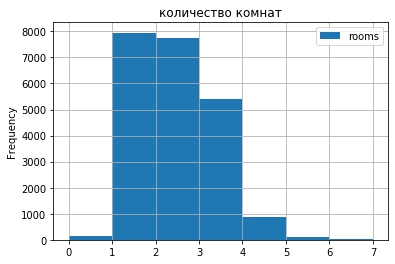

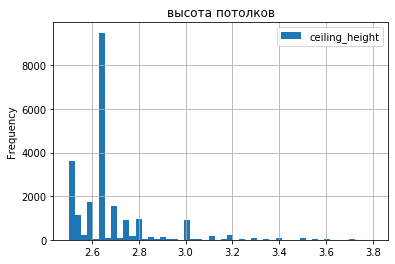

In [19]:
df.plot(y='total_area', kind='hist', title='общая площадь', bins=50, grid=True)
df.plot(y='last_price', kind='hist', title='цена', bins=50, grid=True)
df.plot(y='rooms', kind='hist', title='количество комнат', bins=7, grid=True)
df.plot(y='ceiling_height', kind='hist', title='высота потолков', bins=50, grid=True)
plt.show()

In [20]:
display(df['total_area'].median())
display(df['last_price'].median())
display(df['rooms'].median())
display(df['ceiling_height'].median())

50.5

4500000.0

2.0

2.65

Вывод:
1-ый график имеет вид Пуассоновского распределения с медианным значением 50.5 кв.м.
2-ой график так же имеет вид Пуассоновского распределения с пиком около 3700000р, медианное значение 4500000
3-ий график показывает что больше всего 1-ых квартир и почти столько де 2-ух комнатных, медиана = 2
4-ый график с пиком около 2.65 и с таким же медианным значением.

Изучим данные о времени продаж.

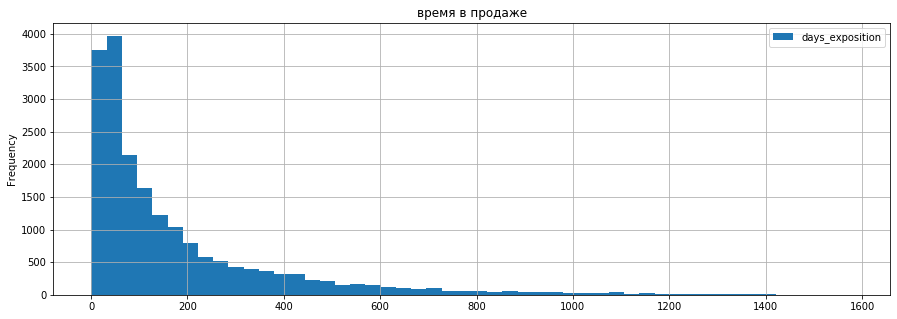

In [21]:
df.plot(y='days_exposition', kind='hist', title='время в продаже', bins=50, grid=True, figsize=(15,5))
plt.show()

In [22]:
display(df['days_exposition'].median()) #Находим медиану
display(df['days_exposition'].mean()) #Находим среднее арифметическое

93.0

176.23397683397684

90.0

136.59113015284854

45    848
60    535
30    199
90    160
14    139
Name: days_exposition, dtype: int64

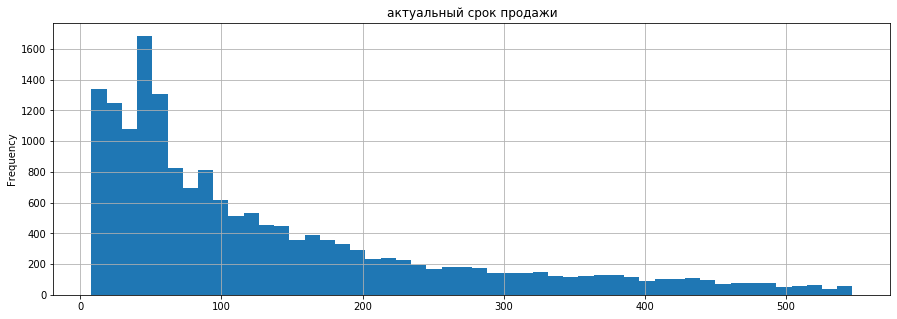

In [23]:
#Сделаем выборку актуального времени продажи
days_exposition_normal = df.query('days_exposition > 7 and days_exposition < 548')['days_exposition'] 
days_exposition_normal.plot(kind='hist', title='актуальный срок продажи', bins=50, grid=True, figsize=(15,5))
days_exposition_normal = days_exposition_normal.astype('int')
display(days_exposition_normal.median()) #Находим медиану
display(days_exposition_normal.mean()) #Находим среднее арифмитическое
display(days_exposition_normal.value_counts().head()) #Самые популярные сроки продажи

Вывод:
Среднее арифмитическое и медиана стали ближе к друг другу. Самый быстрый срок продажи я посчитал в неделю, а самый долгий в 1.5 года.

Изучим, зависимость цены от площади, числа комнат, удалённости от центра.

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.745906,0.456447,-0.351387
total_area,0.745906,1.000000,0.795494,-0.174917
rooms,0.456447,0.795494,1.000000,-0.108288
cityCenters_nearest,-0.351387,-0.174917,-0.108288,1.000000


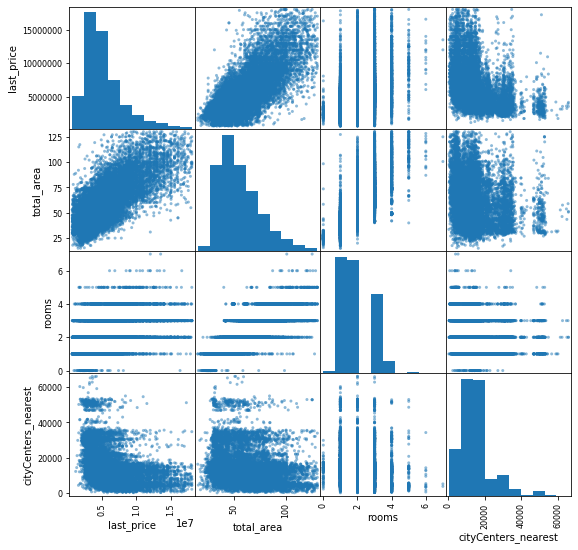

In [24]:
price_corr = df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']] 
pd.plotting.scatter_matrix(price_corr, figsize=(9, 9))
display(df[['last_price','total_area', 'rooms', 'cityCenters_nearest']].corr()) #Таблица зависимости значений

Вывод:
1. Зависимость стоимости квартиры от площади является ощутимой и положительной, то есть с ростом площади растет и цена.
2. зависимость стоимсоти от количества комнат так же заметна хоть и в меньшей степени, с ростом числа комнат растет и цена.
3. Чем дальше квартира тем дешевле ее стоимость.

Изучим, зависимость цены от этажа квартиры.

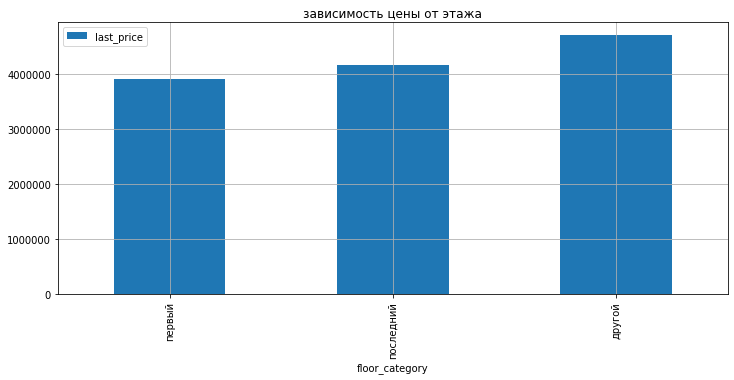

In [25]:
price_floor = df[['floor_category', 'last_price']].groupby(['floor_category']).median().sort_values('last_price')
price_floor.plot(kind='bar', title='зависимость цены от этажа', grid=True, figsize=(12,5))
plt.show()

Вывод:
Самые дешевые квартиры на первом этаже, немногим больше на последнем. Зависимость есть.

Зависимость цены от даты размещения: дня недели, месяца и года.

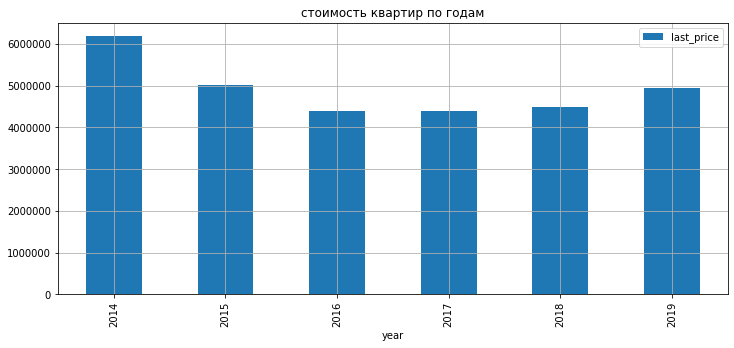

In [26]:
price_year = df[['year', 'last_price']].groupby(['year']).median().sort_index()
price_year.plot(kind='bar', title='стоимость квартир по годам', grid=True, figsize=(12,5))
plt.show()

Вывод:
Пик цен был в 2014г. с тех по цены падают. В 2016г. цена достигла своей низшей точки и показатели остались такими же до 2017г.
С 2017г. - 2019г. наблядается рост цен и в 2019г. останавливается на том же уровне что и был в 2015г.

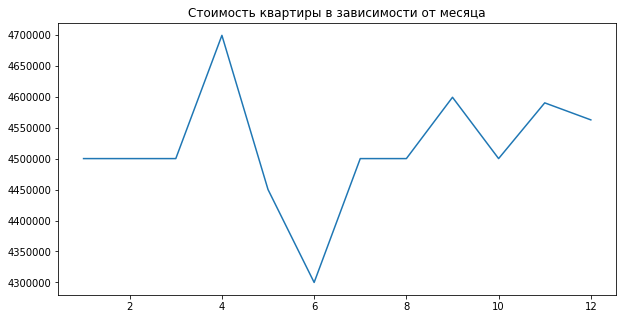

In [27]:
price_month = df[['month', 'last_price']].groupby(['month']).median().sort_index()
#price_month.plot(kind='bar', title='зависимость цены от месяца', grid=True, figsize=(12,5)) #Первый вариант графика, 
                                                                                             #но не очень наглядный
plt.figure(figsize=(10,5))
plt.plot(price_month['last_price'])
plt.title('Стоимость квартиры в зависимости от месяца')
plt.show()

Вывод:
Самые дешевые цены на квартиры в июне месяце, а самые дорогие в апреле.

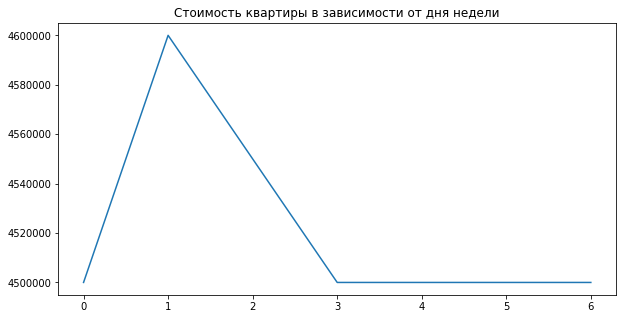

In [28]:
price_weekday = df[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()
#price_weekday.plot(kind='bar', title='зависимость цены от дня недели', grid=True, figsize=(12,5)) #Первый вариант графика, 
                                                                                                  #но не очень наглядный
plt.figure(figsize=(10,5))    
plt.plot(price_weekday['last_price'])
plt.title('Стоимость квартиры в зависимости от дня недели')
plt.show()

Вывод:
Пик цен на квартиры приходится на вторник, затем к четвергу цена опускается и остается на таком уровне вплоть до понедельника.

Десять населённых пунктов с самой высокой стоимостью за один квадратный метр.

In [29]:
top_locality = df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.values.tolist()
filter_locality = df.query('locality_name in @top_locality')
filter_locality.groupby('locality_name')['metr_price'].median().sort_values(ascending=False)

locality_name
Санкт-Петербург      103371.0
Пушкин                99542.0
посёлок Парголово     91984.5
деревня Кудрово       91667.0
посёлок Мурино        85657.0
посёлок Шушары        76829.0
Колпино               74723.5
Гатчина               67925.0
Всеволожск            65789.0
Выборг                58357.5
Name: metr_price, dtype: float64

Вывод:
Как и ожидалось самые высокие цена на жилье в Санкт-Петербурге, затем идет Пушкин. В п.Парголово и д.Кудрово цены примерно одинаковые. Самые низкие цены в Выборге.

Нахождение границ центра города(Санкт-Петербург)

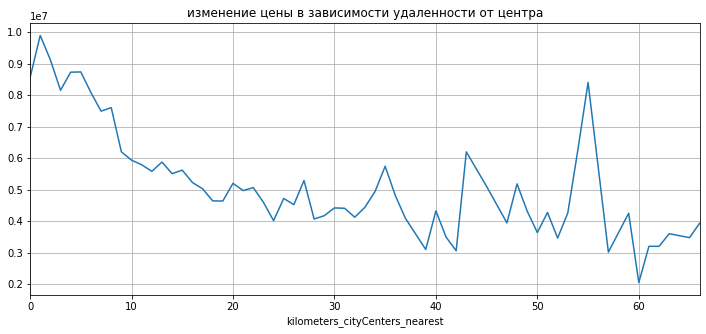

In [30]:
df['kilometers_cityCenters_nearest'] = (df['cityCenters_nearest'] / 1000).round()
center_city = df.groupby('kilometers_cityCenters_nearest')['last_price'].mean() 
center_city.plot(x='kilometers_cityCenters_nearest', y='last_price', title='изменение цены в зависимости удаленности от центра', grid=True, figsize=(12,5))
plt.show()

Вывод:
График показывает резкий скачок в районе 8км. видимо это и есть граница центра города.

Изучим следующие параметры: площадь, цена, число комнат, высота потолков в центре города. И сравним их с результатами по всему датафрейму.

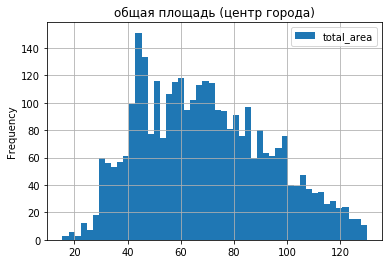

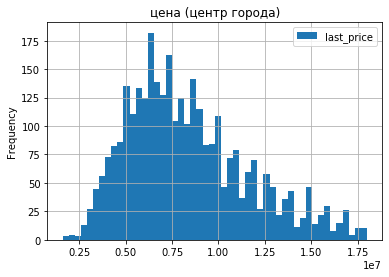

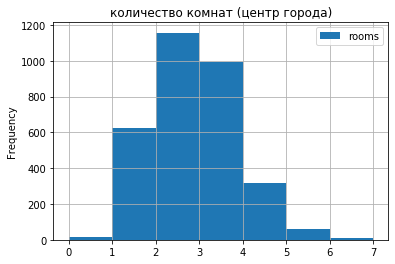

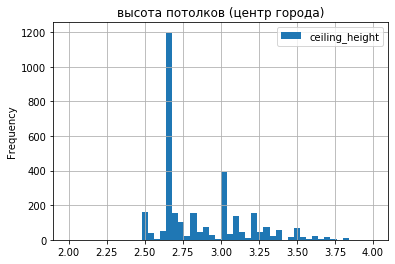

In [31]:
rooms_incenter = df.query('kilometers_cityCenters_nearest <= 8 and locality_name == "Санкт-Петербург"')
rooms_incenter.plot(y='total_area', kind='hist', title='общая площадь (центр города)', bins=50, grid=True)
rooms_incenter.plot(y='last_price', kind='hist', title='цена (центр города)', bins=50, grid=True)
rooms_incenter.plot(y='rooms', kind='hist', title='количество комнат (центр города)', bins=7, grid=True)
rooms_incenter.plot(y='ceiling_height', kind='hist', title='высота потолков (центр города)', bins=50, grid=True, range=(2, 4))
plt.show()

In [32]:
display(rooms_incenter['total_area'].median())
display(rooms_incenter['last_price'].median())
display(rooms_incenter['rooms'].median())
display(rooms_incenter['ceiling_height'].median())

67.5

7800000.0

2.0

2.7

Вывод:
Сравнение будем проводить с выборкой по всем данным с аналогичными исследованиями по медианному значению.
Однозначно можно сказать, что квартиры в центре обладают гораздо большей площадью и разумеется большей ценой (практически 8 миллионов). Что касается комнат, то в центре больше двух и трехкомнатных квартир, в то время как в других районах больше однокомнатных. Высота потолков в целом одинакова, лишь немногоим в центре больше.

Отыщем факторы которые влияют на стоимость квартир в центре города(Санкт_петербург):число комнат, этаж, удалённость от центра, дата размещения объявления.

Зависимость цены от числа комнат(центр города)

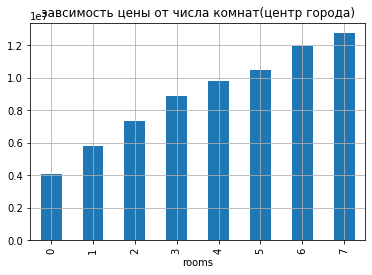

In [33]:
center_rooms = rooms_incenter.groupby('rooms')['last_price'].median()
center_rooms.plot(x='rooms', y='last_price', kind='bar', title='завсимость цены от числа комнат(центр города)', grid=True)
plt.show()

Вывод:
Так же как и во всех данных стоимость квартиры растет с увеличением числа комнат.

Зависимость цены от площади(центр города)

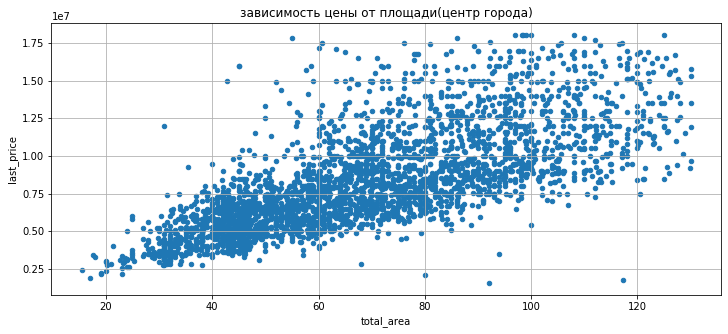

0.7183493263393205

In [34]:
rooms_incenter.plot(x='total_area', y='last_price', kind='scatter', title='зависимость цены от площади(центр города)', 
                       grid=True, figsize=(12,5))
plt.show()
display(rooms_incenter['total_area'].corr(rooms_incenter['last_price'])) #Корреляция

Вывод:
Так же как и по всему датасету наблюдается прямопропорциональная зависимость.

Зависимость цены от этажа(центр города)

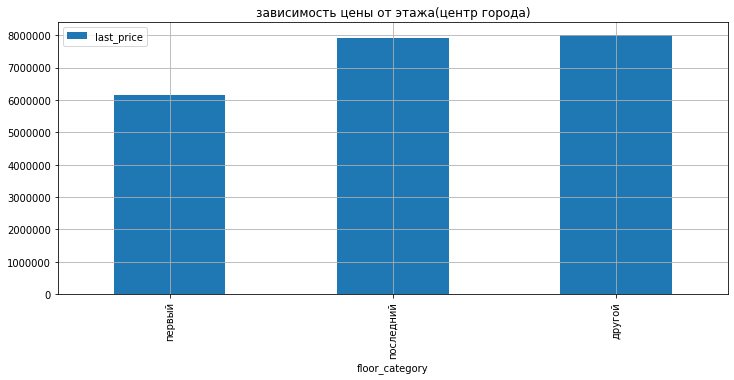

In [35]:
price_floor_center = rooms_incenter[['floor_category', 'last_price']].groupby(['floor_category']).median().sort_values('last_price')
price_floor_center.plot(kind='bar', title='зависимость цены от этажа(центр города)', grid=True, figsize=(12,5))
plt.show()

Вывод:
Так же как и в других местах квартиры на первом этаже в центре Санкт-Петербурга дешевле, а далее цена практически не различается.

Зависимость цены от удаленности от центра(центр города)

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.153738
last_price,-0.153738,1.000000


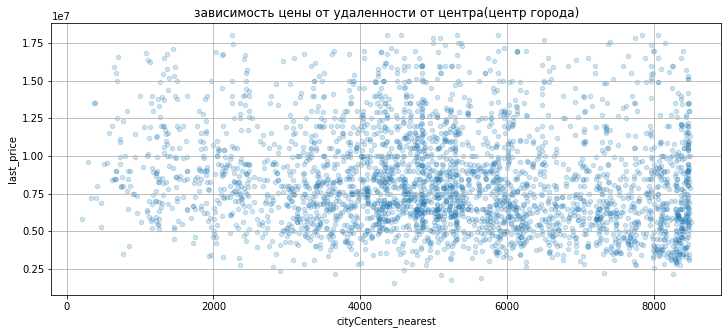

In [36]:
rooms_incenter.plot(x='cityCenters_nearest', y='last_price', kind='scatter', 
                    title='зависимость цены от удаленности от центра(центр города)', grid=True, figsize=(12,5), alpha=0.21)
display(rooms_incenter[['cityCenters_nearest', 'last_price']].corr())
plt.show()

Вывод:
Никакой зависимости не наблюдается, относительно центра города квартиры располагаются по разному(вразброс).

Стоимость квартир по годам(центр города)

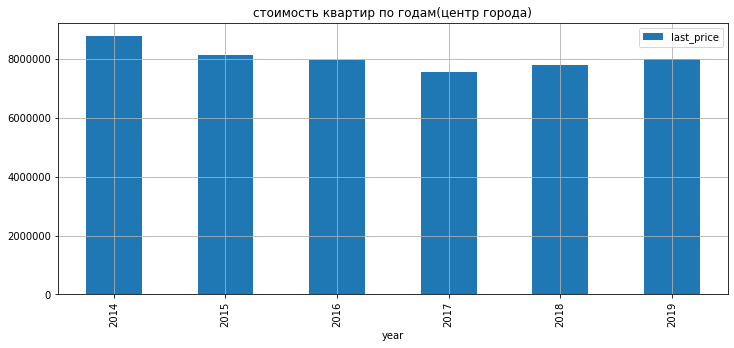

In [37]:
price_year_center = rooms_incenter[['year', 'last_price']].groupby(['year']).median().sort_index()
price_year_center.plot(kind='bar', title='стоимость квартир по годам(центр города)', grid=True, figsize=(12,5))
plt.show()

Вывод:
Диаграмма носит тот же характер что и для остальных квартир, с 2017г. начинается повышение цен. Разница лишь в том, что падение цен было до 2017г. включительно.

Стоимость квартиры в зависимости от месяца(центр города)

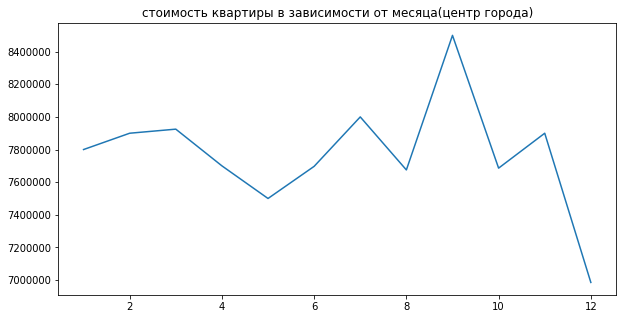

In [38]:
price_month_center = rooms_incenter[['month', 'last_price']].groupby(['month']).median().sort_index()
plt.figure(figsize=(10,5))
plt.plot(price_month_center['last_price'])
plt.title('стоимость квартиры в зависимости от месяца(центр города)')
plt.show()

Вывод:
Здесь наблюдается совершенно иная картина. Самая низкая стоимость приходится на декабрь(отличный способ сделать подарок на НГ). Пик цен выпадает на сентябрь, возможно это связано с началом учебного года. Так же заметен спад цен в мае.

Стоимость квартиры в зависимости от дня недели(центр города)

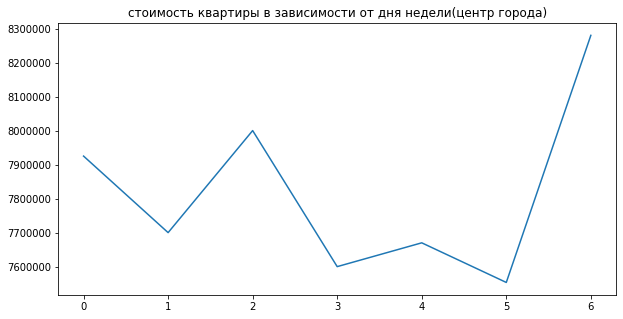

In [39]:
price_weekday_center = rooms_incenter[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()
plt.figure(figsize=(10,5))    
plt.plot(price_weekday_center['last_price'])
plt.title('стоимость квартиры в зависимости от дня недели(центр города)')
plt.show()

Вывод:
График показывает, что здесь, так же как и в случаи с месяцем, ситуация существенно различается. Самые низкие цены в субботу, и сразу же после этого в воскресенье цена достигает своего пика. В среду так же наблюдается рост цен, а во вторник и четверг заметный спад.

## Общий вывод

В данной работе я провел исследования рынка недвижимости на основе объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах в период с 2014 по 2019гг.
Целью исследования было нахождения параметров и взаимосвязей которые влияют на рыночную стоимость квартиры
1. На первом этапе были обнаружены множественные пропуски и аномалии в данных.
2. Следующим шагом была осуществлена заменена пропусков, устранены аномалии и преобразован тип данных.
3. На третьем этапе были сформированы следующие столбцы с данными:
                                            цена квадратного метра;
                                            день недели, месяц и год публикации объявления;
                                            этаж квартиры: первый, последний, другой;
                                            соотношение жилой и общей площади, а также отношение площади кухни к общей.
4. Тщательно проанализировав все данные были сделаны следующие выводы:
- Самые дорогие квартиры в Санкт-Петербурге и Пушкине, а самые дешевые в Выборге.
- Среднее время продажи квартиры составляет три месяца.
- С 2014г. по 2017г. цены на квартиры упали на 2млн.р.
- Квартиры на первом этаже стоят дешевле.
- Самую высокую стоимость можно увидеть во вторник в апреле, а самую низкую в июньскую субботу или воскресенье.
- Центр Санкт-Петербурга радиусом около 8-9 км.
- Рост цены напрямую зависит от площади жилья и числа комнат.
- Стоимость квартиры обратно пропорциональна расстоянию до центра города.
Центр
- Квартиры в центре отличаются сразу по нескольким параметрам:
                                                             1. в среднем площадь больше на 17 кв.м.
                                                             2. среди публикаций на продажу гораздо чаще встречаются двух и                                                                     трехкомнатные квартиры.
                                                             3. в среднем цена выше на 73%
- Цены на квартиры в центре так же падали с 2014г., разница только лишь между 2016г. и 2017г., где у последнего цена не осталась на уровне и продолжила падать.
- Пик цен приходится на сентябрь (возможно это как-то связано с началом учебного года у студентов) и на воскресенье, в то время как спад наблюдается в декабре и во вторник, где можно застать самые низкие цены.
- Как и в выборке по всему датафрейму стоимость квартир в центре зависит от площади, числа комнат и от этажа (на первом самые дешевые, далее цена практически не меняется), а вот скалирования цены от расстояния до центра не наблюдается.

В данной работе исследования собраны в достаточном объеме и потому дополнительный анализ, сводные таблицы считаю излишним. 